<a href="https://colab.research.google.com/github/SHREYA-2003/iris_flower_classification/blob/main/fraud_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 📌 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings('ignore')

# 📌 2. Load Dataset
df = pd.read_csv("/content/Fraud.csv")  # Update filename if needed
print("Data shape:", df.shape)
df.head()

# 📌 3. Data Cleaning

# Missing Values
print("Missing Values:\n", df.isnull().sum())

# Fill or drop missing values
df = df.dropna()  # or fill with imputation if applicable

# Remove Duplicates
df = df.drop_duplicates()

# Outliers: Apply IQR only to numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Keep only rows that are within the IQR range for all numeric columns
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Multicollinearity Check
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 📌 4. Feature Selection & Engineering

# Drop highly correlated or irrelevant features
# Example: df = df.drop(columns=['unwanted_feature'])

# Define target and features
X = df.drop(columns='is_fraud')  # Replace 'is_fraud' with actual label column name
y = df['is_fraud']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using Random Forest importance
selector = RandomForestClassifier(random_state=42)
selector.fit(X_scaled, y)

feat_importances = pd.Series(selector.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top Feature Importances")
plt.show()

selected_features = feat_importances.nlargest(10).index
X_selected = X[selected_features]

# 📌 5. Model Building

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 6. Model Evaluation

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 📌 7. Insights
print("Top Factors Predicting Fraud:")
print(feat_importances.nlargest(10))

# 📌 8. Recommendations for Infrastructure Updates
recommendations = [
    "Enable real-time fraud detection system integration",
    "Add multi-layer authentication and biometric verification",
    "Use anomaly detection for high-frequency transactions",
    "Log and monitor system activity for internal threats"
]
for r in recommendations:
    print("- ", r)

# 📌 9. Post-Implementation Evaluation
print("\nTo evaluate effectiveness of preventive measures:")
evaluation_methods = [
    "Monitor fraud rate reduction over time",
    "Compare model accuracy pre- and post-deployment",
    "Conduct user surveys for feedback",
    "Audit logs and alert tracking"
]
for e in evaluation_methods:
    print("- ", e)


Data shape: (2682189, 11)
Missing Values:
 step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


ValueError: could not convert string to float: 'PAYMENT'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
df = pd.read_csv("/content/Fraud.csv")  # Replace with actual path
print("Initial shape:", df.shape)
df.head()

Initial shape: (1792104, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
# Drop ID-like columns that don't help prediction
df.drop(columns=['nameOrig', 'nameDest'], inplace=True)

# Encode 'type' column (e.g., PAYMENT, TRANSFER) with LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])


In [3]:
# Check for missing values
print(df.isnull().sum())

# If any, drop or fill
df.dropna(inplace=True)


step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [4]:
# Features and label
X = df.drop(columns=['isFraud', 'isFlaggedFraud'])  # 'isFraud' is the target
y = df['isFraud']


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    537105
           1       0.98      0.74      0.84       527

    accuracy                           1.00    537632
   macro avg       0.99      0.87      0.92    537632
weighted avg       1.00      1.00      1.00    537632

Confusion Matrix:
 [[537096      9]
 [   135    392]]
ROC AUC Score: 0.982556391514018


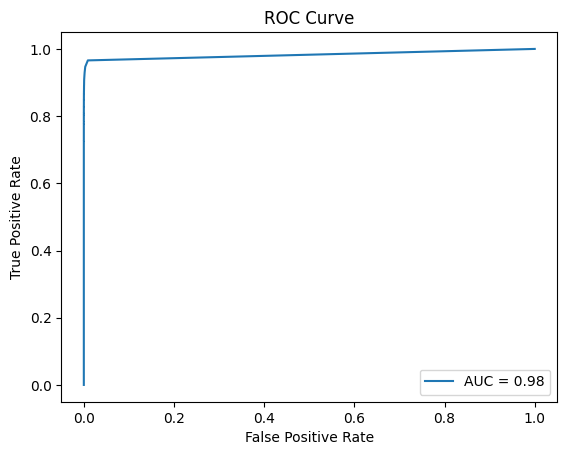

In [7]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Top Predictive Features:
 newbalanceDest    0.272220
oldbalanceOrg     0.258790
amount            0.202454
step              0.119949
oldbalanceDest    0.093122
type              0.030182
newbalanceOrig    0.023283
dtype: float64


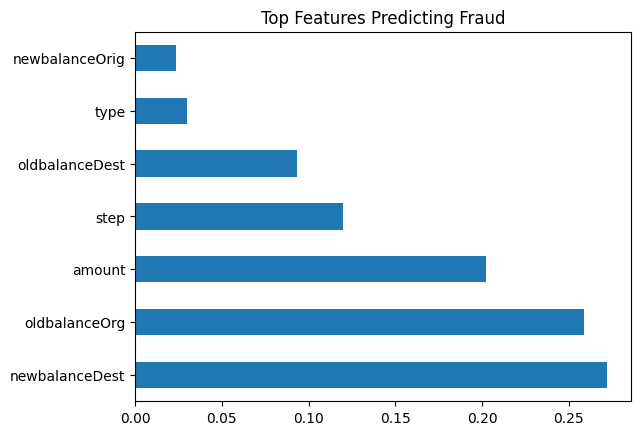

In [8]:
feature_names = df.drop(columns=['isFraud', 'isFlaggedFraud']).columns
importances = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
print("Top Predictive Features:\n", importances)

# Plot top features
importances.head(10).plot(kind='barh')
plt.title("Top Features Predicting Fraud")
plt.show()
